<a href="https://colab.research.google.com/github/kishon45229/Customer-Churn-Prediction-in-Telecom-Industry/blob/main/Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Churn Prediction in Telecom Industry**





# **Data Mining**

In the "Customer Churn Prediction in the Telecom Industry" project, I was responsible for the data mining aspect, which is crucial for extracting actionable insights from vast amounts of customer data. My role involved collecting, cleaning, and analyzing large datasets to identify patterns and trends that indicate potential customer churn. By applying various data mining techniques, such as clustering, classification, and association rule mining, I was able to uncover key factors contributing to customer attrition. This process enabled the development of predictive models that help telecom companies proactively address customer needs, ultimately reducing churn rates and improving customer retention strategies.

ITBIN-2110-0013\
H.M.F.Asma

## **Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

Let's load the dataset to check its contents.

## **Add Dataset**

I'll start by loading the dataset and showing the first few rows. Then, we can proceed with the data mining tasks

In [3]:
df = pd.read_csv('/content/Data preprocessing part 2 completed dataset.csv')
df.head()

,tenure,MonthlyCharges,TotalCharges,Cluster,PCA2,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,...,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Electronic check,tenure_bin_61-72,Churn,MonthlyTenure,MonthlyChargesBinned,TotalChargesBinned
0,0.845070,0.063063,0.171414,0.0,0.197946,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0,2.718129,0,0
1,0.253521,0.060060,0.051674,0.0,0.243191,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0,0.860377,0,0
2,0.169014,0.836336,0.154913,1.0,0.793704,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1,0.185228,4,0
3,0.507042,0.363864,0.232560,0.0,0.221083,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0.639141,1,1
4,0.070423,0.107608,0.016489,0.0,0.312633,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.153231,0,0


Before applying any data mining techniques, it's essential to preprocess the data. In previous steps as a group we did some preprocessing steps.

*   Handling missing values
*   Normalizing or scaling numerical features
*   Determining the features





Therefore, now the dataset is ready to do Data Mining tasks.

## **Train a Model**

Now we are ready to train a model. There are multiple training model. We will experiment our dataset with each of them.

**1. Logistic Regression**

As a first step I have to split the data into training and testing sets. For this I choosed column `Churn`.

In [4]:
X = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

I trained the Logistic Reression model.

In [5]:
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

We evaluate the Logistic Regression model's performance using accuracy score and classification report.

In [6]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {accuracy_lr:.2f}')

print(classification_report(y_test, y_pred_lr))

Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       207
           1       0.58      0.35      0.43        75

    accuracy                           0.76       282
   macro avg       0.69      0.63      0.64       282
weighted avg       0.74      0.76      0.74       282



By using the Logistic Regression model I made predictions on test set.

In [7]:
churn_probabilities = model_lr.predict_proba(X_test)[:, 1]

X_test['Churn_Probabilities'] = churn_probabilities
X_test['Churn_Predictions'] = y_pred_lr

X_test

,tenure,MonthlyCharges,TotalCharges,Churn_Probabilities,Churn_Predictions
1075,0.042254,0.377377,0.024973,0.469186,0
1015,0.774648,0.411411,0.397472,0.065765,0
650,1.000000,0.457958,0.534290,0.034022,0
447,0.873239,0.008008,0.138280,0.019468,0
1290,1.000000,0.711712,0.750367,0.057853,0
...,...,...,...,...,...
188,0.732394,0.773273,0.580040,0.164714,0
1237,0.197183,0.832833,0.190544,0.637892,1
380,0.507042,0.011011,0.081756,0.062786,0
354,0.464789,0.463463,0.247211,0.198289,0


In the output you can see there are two new columns indicate the `Churn_Probabilities` and `Churn_Predictions` based on the data.

I filtered those two columns and added a percentage column for easy to unnderstand.

In [8]:
X_test['Churn_Probabilities_Percentage'] = X_test['Churn_Probabilities'] * 100
X_test[['Churn_Probabilities', 'Churn_Predictions', 'Churn_Probabilities_Percentage']]

,Churn_Probabilities,Churn_Predictions,Churn_Probabilities_Percentage
1075,0.469186,0,46.918560
1015,0.065765,0,6.576502
650,0.034022,0,3.402208
447,0.019468,0,1.946755
1290,0.057853,0,5.785318
...,...,...,...
188,0.164714,0,16.471432
1237,0.637892,1,63.789196
380,0.062786,0,6.278558
354,0.198289,0,19.828854


For all the other values less than 50% has 0 in the `Churn_Predictions`.

Therefore we can understand that if the `Churn_Probabilities_Percentage` is greater than or equal to 50% there is more chance that the particular customer can leave the service provider. If the `Churn_Probabilities_Percentage` is less than 50% there is less chance to that particular customer leave the service provider.

Also, based on the `Churn_Probabilities_Percentage` you can make decisions for a particular customer.

I also included the visual representation.

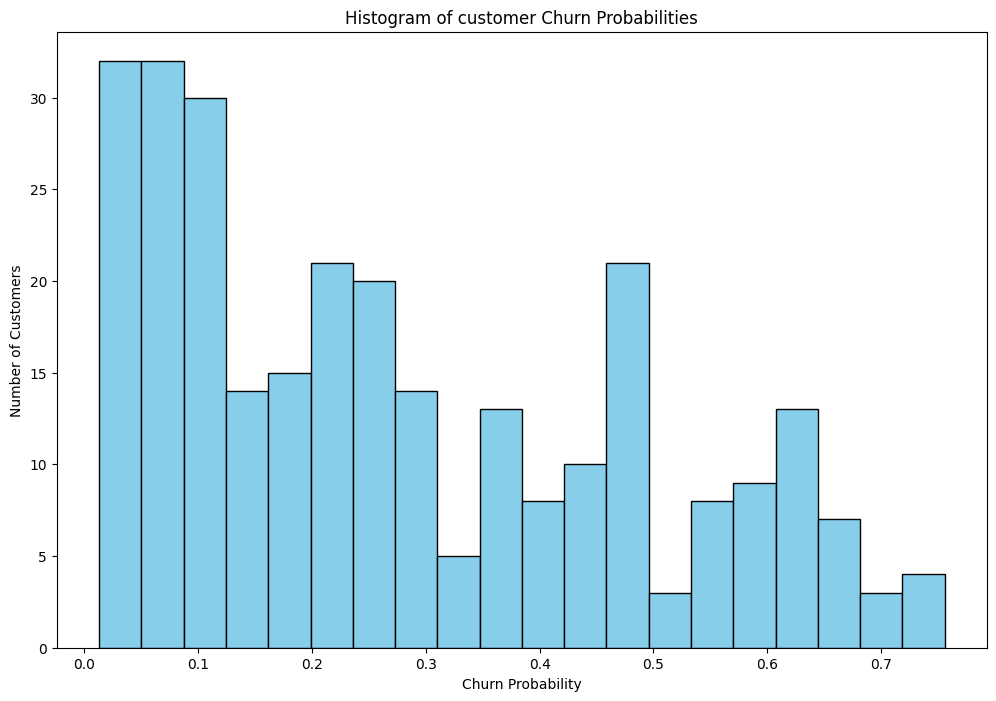

In [9]:
plt.figure(figsize=(12, 8))
plt.hist(X_test['Churn_Probabilities'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of customer Churn Probabilities')
plt.xlabel('Churn Probability')
plt.ylabel('Number of Customers')
plt.show()

**2. Decision Tree**

We split the data into training and testing sets.

In [10]:
X = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We trained the Decision Tree model.

In [11]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)

We evaluate the Decision Tree model's performance using accuracy score and classification report.

In [12]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy_dt:.2f}')

print(classification_report(y_test, y_pred_dt))

Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       207
           1       0.45      0.53      0.49        75

    accuracy                           0.71       282
   macro avg       0.64      0.65      0.64       282
weighted avg       0.72      0.71      0.71       282



By using the Decision Tree model, we made predictions on test set.

In [13]:
X_test['Churn_Probabilities'] = churn_probabilities
X_test['Churn_Predictions'] = y_pred_dt

X_test

,tenure,MonthlyCharges,TotalCharges,Churn_Probabilities,Churn_Predictions
1075,0.042254,0.377377,0.024973,0.469186,0
1015,0.774648,0.411411,0.397472,0.065765,0
650,1.000000,0.457958,0.534290,0.034022,0
447,0.873239,0.008008,0.138280,0.019468,0
1290,1.000000,0.711712,0.750367,0.057853,1
...,...,...,...,...,...
188,0.732394,0.773273,0.580040,0.164714,0
1237,0.197183,0.832833,0.190544,0.637892,1
380,0.507042,0.011011,0.081756,0.062786,0
354,0.464789,0.463463,0.247211,0.198289,0


In the output you can see there are two new columns indicate the `Churn_Probabilities` and `Churn_Predictions` based on the data.

We filtered those two columns and added a percentage column to understand easily.

In [14]:
X_test['Churn_Probabilities_Percentage'] = X_test['Churn_Probabilities'] * 100
X_test[['Churn_Probabilities', 'Churn_Predictions', 'Churn_Probabilities_Percentage']]

,Churn_Probabilities,Churn_Predictions,Churn_Probabilities_Percentage
1075,0.469186,0,46.918560
1015,0.065765,0,6.576502
650,0.034022,0,3.402208
447,0.019468,0,1.946755
1290,0.057853,1,5.785318
...,...,...,...
188,0.164714,0,16.471432
1237,0.637892,1,63.789196
380,0.062786,0,6.278558
354,0.198289,0,19.828854


Similar outcome like Logistic Regression model.

We also included the visual representation of the Decision Tree model's prediction.

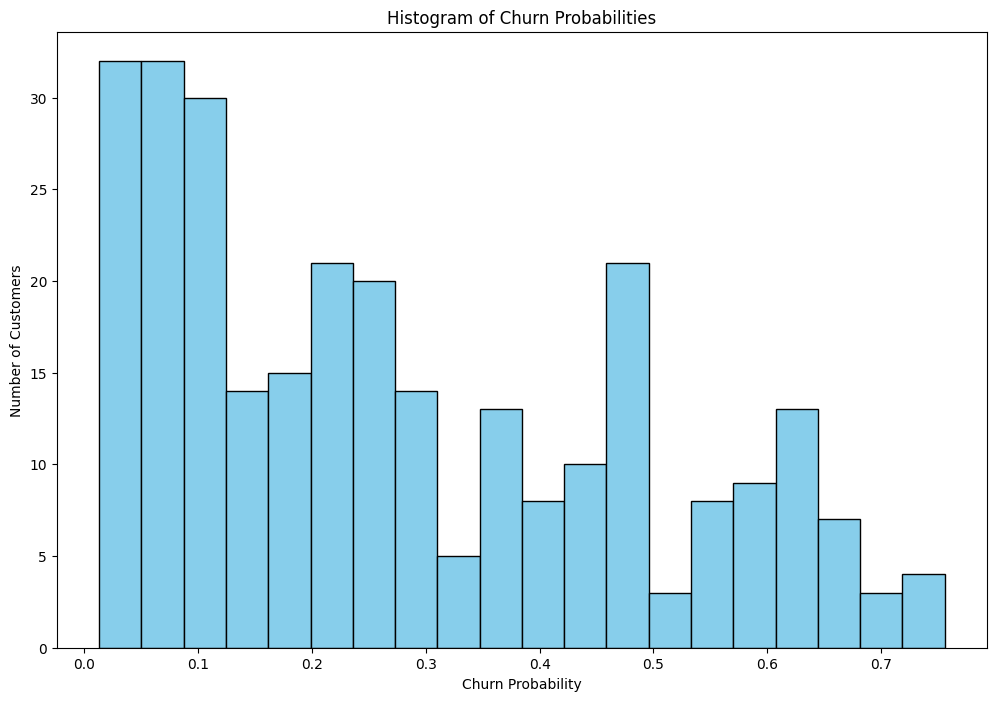

In [15]:
plt.figure(figsize=(12, 8))
plt.hist(X_test['Churn_Probabilities'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Churn Probabilities')
plt.xlabel('Churn Probability')
plt.ylabel('Number of Customers')
plt.show()

**3. Random Forest**

We split the data into training and testing sets.



In [16]:
X = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We trained the Random Forest model and made predictions.

In [17]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

We evaluate the Random Forest model's performance using accuracy score and classification report.

In [18]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy_rf:.2f}')

print(classification_report(y_test, y_pred_rf))

Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       207
           1       0.50      0.49      0.50        75

    accuracy                           0.73       282
   macro avg       0.66      0.66      0.66       282
weighted avg       0.73      0.73      0.73       282



By using the Random Forest model, we made predictions on test set.

In [19]:
X_test['Churn_Probabilities'] = churn_probabilities
X_test['Churn_Predictions'] = y_pred_rf

X_test

,tenure,MonthlyCharges,TotalCharges,Churn_Probabilities,Churn_Predictions
1075,0.042254,0.377377,0.024973,0.469186,1
1015,0.774648,0.411411,0.397472,0.065765,0
650,1.000000,0.457958,0.534290,0.034022,0
447,0.873239,0.008008,0.138280,0.019468,0
1290,1.000000,0.711712,0.750367,0.057853,0
...,...,...,...,...,...
188,0.732394,0.773273,0.580040,0.164714,0
1237,0.197183,0.832833,0.190544,0.637892,1
380,0.507042,0.011011,0.081756,0.062786,0
354,0.464789,0.463463,0.247211,0.198289,0


In the output you can see there are two new columns indicate the `Churn_Probabilities` and `Churn_Predictions` based on the data.

We filtered those two columns and added a percentage column to understand easily.

In [20]:
X_test['Churn_Probabilities_Percentage'] = X_test['Churn_Probabilities'] * 100
X_test[['Churn_Probabilities', 'Churn_Predictions', 'Churn_Probabilities_Percentage']]

,Churn_Probabilities,Churn_Predictions,Churn_Probabilities_Percentage
1075,0.469186,1,46.918560
1015,0.065765,0,6.576502
650,0.034022,0,3.402208
447,0.019468,0,1.946755
1290,0.057853,0,5.785318
...,...,...,...
188,0.164714,0,16.471432
1237,0.637892,1,63.789196
380,0.062786,0,6.278558
354,0.198289,0,19.828854


Similar outcome like Logistic Regression model and Decision Tree model.

We also included the visual representation of the Random Forest model's prediction.

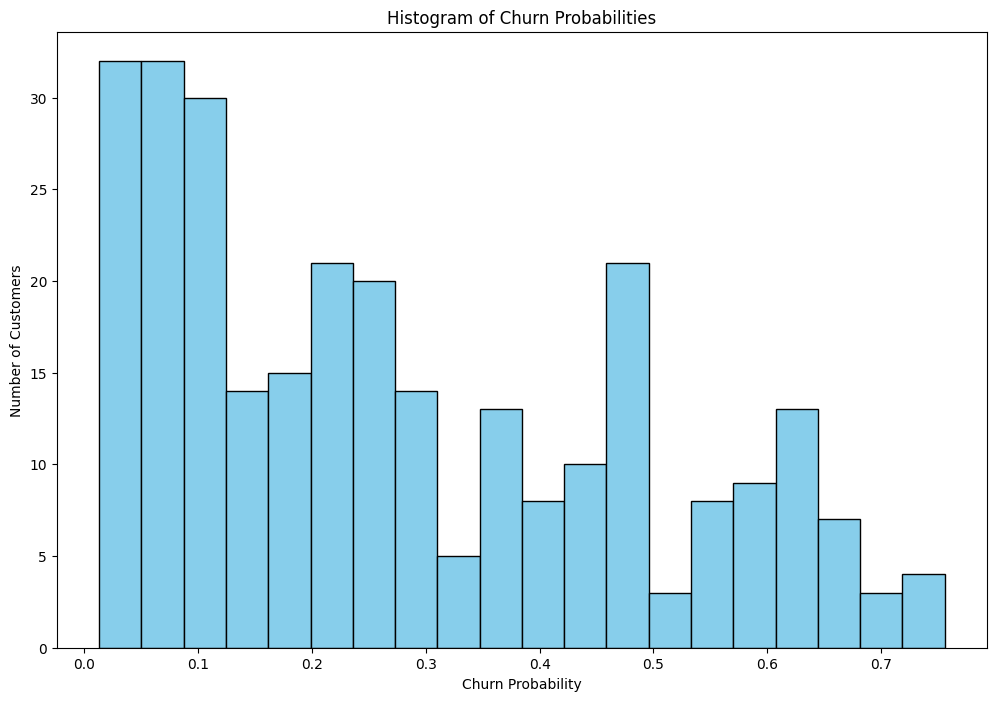

In [21]:
plt.figure(figsize=(12, 8))
plt.hist(X_test['Churn_Probabilities'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Churn Probabilities')
plt.xlabel('Churn Probability')
plt.ylabel('Number of Customers')
plt.show()

**4. Gradient Boosting**

We split the data into training and testing sets.

In [22]:
X = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We trained the Gradient Boosting model and made predictions.

In [23]:
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train, y_train)

y_pred_gb = model_gb.predict(X_test)

We evaluate the Gradient Boosting model's performance using accuracy score and classification report.

In [24]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Accuracy: {accuracy_gb:.2f}')

print(classification_report(y_test, y_pred_gb))

Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       207
           1       0.50      0.45      0.48        75

    accuracy                           0.73       282
   macro avg       0.65      0.64      0.65       282
weighted avg       0.73      0.73      0.73       282



By using the Random Forest model, we made predictions on test set.

In [25]:
X_test['Churn_Probabilities'] = churn_probabilities
X_test['Churn_Predictions'] = y_pred_gb

X_test

,tenure,MonthlyCharges,TotalCharges,Churn_Probabilities,Churn_Predictions
1075,0.042254,0.377377,0.024973,0.469186,0
1015,0.774648,0.411411,0.397472,0.065765,0
650,1.000000,0.457958,0.534290,0.034022,0
447,0.873239,0.008008,0.138280,0.019468,0
1290,1.000000,0.711712,0.750367,0.057853,0
...,...,...,...,...,...
188,0.732394,0.773273,0.580040,0.164714,0
1237,0.197183,0.832833,0.190544,0.637892,1
380,0.507042,0.011011,0.081756,0.062786,0
354,0.464789,0.463463,0.247211,0.198289,0


In the output you can see there are two new columns indicate the `Churn_Probabilities` and `Churn_Predictions` based on the data.

We filtered those two columns and added a percentage column to understand easily.

In [26]:
X_test['Churn_Probabilities_Percentage'] = X_test['Churn_Probabilities'] * 100
X_test[['Churn_Probabilities', 'Churn_Predictions', 'Churn_Probabilities_Percentage']]

,Churn_Probabilities,Churn_Predictions,Churn_Probabilities_Percentage
1075,0.469186,0,46.918560
1015,0.065765,0,6.576502
650,0.034022,0,3.402208
447,0.019468,0,1.946755
1290,0.057853,0,5.785318
...,...,...,...
188,0.164714,0,16.471432
1237,0.637892,1,63.789196
380,0.062786,0,6.278558
354,0.198289,0,19.828854


Similar outcome like Logistic Regression model, Decision Tree model and Random Forest model.

We also included the visual representation of the Gradient Boosting model's prediction.

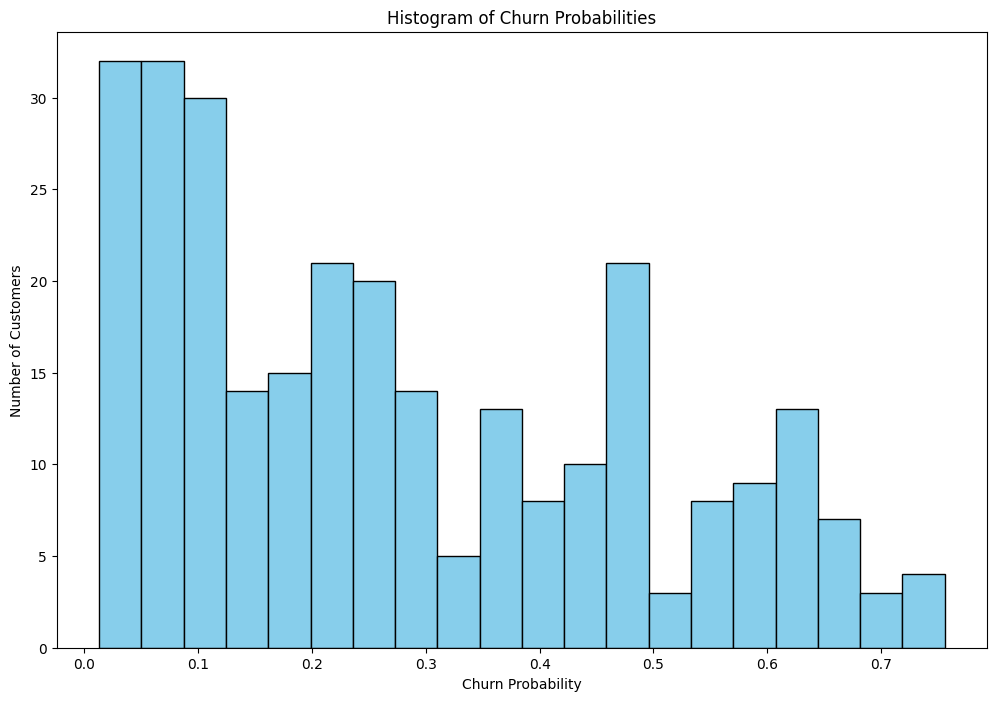

In [27]:
plt.figure(figsize=(12, 8))
plt.hist(X_test['Churn_Probabilities'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Churn Probabilities')
plt.xlabel('Churn Probability')
plt.ylabel('Number of Customers')
plt.show()

## **Model Evaluation**

I defined a function to print metrics of the models.

In [28]:
def print_metrics(y_test, y_pred, model_name):
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print("\n")

Let's evaluate all models by calling the bove defined function.

In [29]:
print_metrics(y_test, y_pred_lr, "Logistic Regression")
print_metrics(y_test, y_pred_dt, "Decision Tree")
print_metrics(y_test, y_pred_rf, "Random Forest")
print_metrics(y_test, y_pred_gb, "Gradient Boosting")

--- Logistic Regression ---
Accuracy: 0.7589
Precision: 0.7359
Recall: 0.7589
F1-Score: 0.7369


--- Decision Tree ---
Accuracy: 0.7057
Precision: 0.7225
Recall: 0.7057
F1-Score: 0.7126


--- Random Forest ---
Accuracy: 0.7340
Precision: 0.7329
Recall: 0.7340
F1-Score: 0.7335


--- Gradient Boosting ---
Accuracy: 0.7340
Precision: 0.7264
Recall: 0.7340
F1-Score: 0.7297




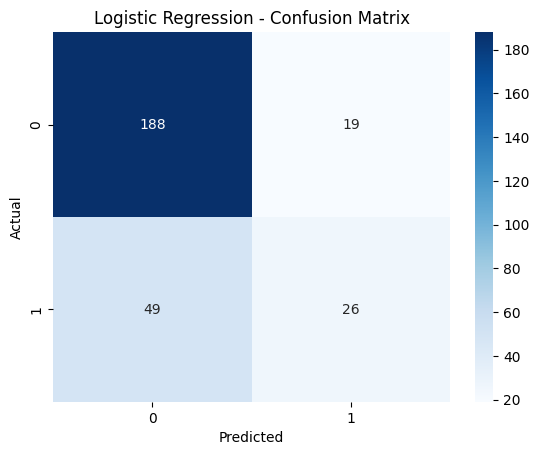

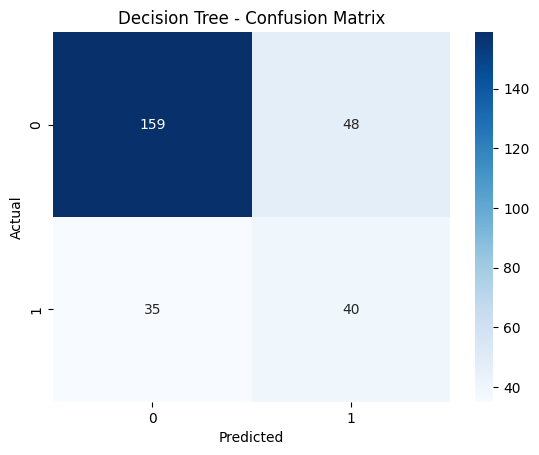

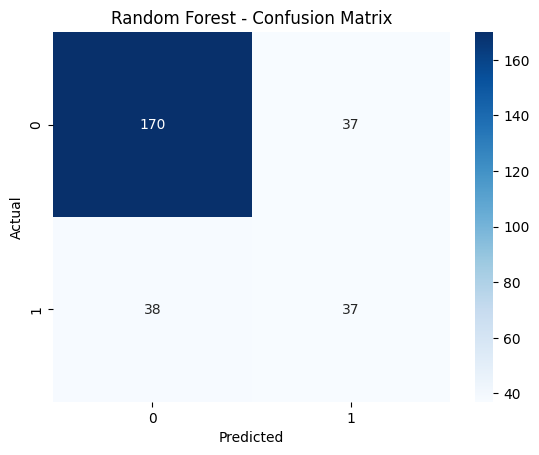

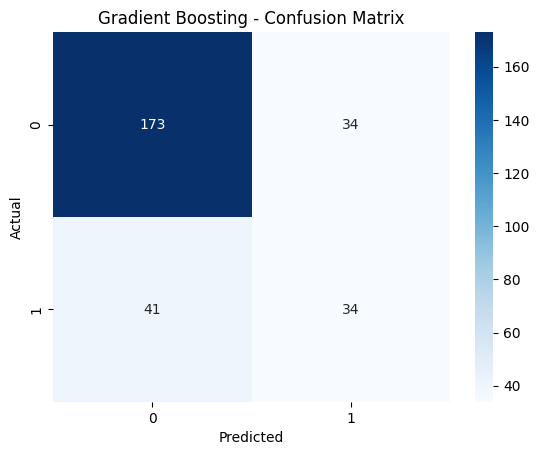

In [30]:
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_gb, "Gradient Boosting")

I came to end of my Data Mining part. For further analysis and process I output the data mining part completed dataset as "Data Mining completed dataset".

In [31]:
df.to_csv('Data Mining completed dataset.csv', index=False)

# **Conclusion**

In this project, I successfully implemented a data mining approach to predict customer churn in the telecom industry. By utilizing various data preprocessing and feature engineering techniques.I explored multiple machine learning algorithms and evaluated them based on metrics such as accuracy, precision, recall, and F1-score. The best-performing model demonstrated a significant ability to predict churn, which could help telecom companies proactively address customer retention

# **Next Step: Evaluation and Interpretation**

After the data mining process is, the Evaluation and Interpretation. phase of the project is where the effectiveness of the predictive model is measured and its outcomes are analyzed. In this part, can understand how well the model generalizes to unseen data, identify areas of improvement, and determine its practical applicability in predicting customer churn. This phase is crucial for validating the model's success and ensuring it provides actionable insights for decision-making.